In [50]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np   
import pandas as pd
import scipy
import sklearn.model_selection
import sklearn.neighbors
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)                          # Annoying
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)  # Annoying

In [25]:
data= pd.read_csv('COMP6321-ML-Project-main/dataset.CSV')

In [26]:
addedcolumn = []
for i in range(1,41):
    for j in range(0,15):
        addedcolumn.append(i)
        
        
del data['file name']
        
data.insert(loc=0, column='person category', value=addedcolumn)

all_data = data.to_numpy()

In [27]:
## we will take 80/20 training testing ratio = 12 rows of each   0-12  15-(15+12)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(all_data[:,1:], all_data[:,0], test_size=0.20, random_state=10)

In [28]:
# First the data should be normalized
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

#in this cell we splitted the MFCC features and MFCC-Delta Features
MFCC_train= X_train[:,:14]
MFCC_Delta_train= X_train[:,14:]
MFCC_test= X_test[:,:14]
MFCC_Delta_test= X_test[:,14:]

As follows we apply the K nearest neighborhood for the MFCC data, The hyperparameter in this classification is k 
that we consider a range of [1,40] and by considering the training and testing error, we choose this hyperparameter
(We prefered to use the Random hyerperarameter search).
Moreover, we use a 10 folded validation to ensure consistent distribution of classes in the training and testing phase and to also ensure that our model does not overfit for a particular split.

In [51]:
np.random.seed(0)  
param_distribution={'n_neighbors':[np.random.randint(1, 30)], 'weights':['uniform', 'distance']} #, 
KNN= sklearn.neighbors.KNeighborsClassifier()
RandomizedSearch= sklearn.model_selection.RandomizedSearchCV(KNN,param_distribution,
                                                             random_state=0, verbose=1, n_iter=20, cv=5)
RandomizedSearch.fit(MFCC_train, y_train); 

KNN_Score= RandomizedSearch.best_score_*100
print("The best score is: %.2f" %KNN_Score)
print("The best patameters is:", RandomizedSearch.best_params_)

# Training and testing Scores
GStrain=RandomizedSearch.best_estimator_.score(MFCC_train,y_train)*100
GStest= RandomizedSearch.best_estimator_.score(MFCC_test,y_test)*100
print('Randomized search:')
print('%.1f%% train accuracy' %GStrain)
print('%.1f%% test accuracy' %GStest)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
The best score is: 84.79
The best patameters is: {'weights': 'distance', 'n_neighbors': 13}
Randomized search:
100.0% train accuracy
84.2% test accuracy


C:\Users\babah\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


## Confusion Matrix

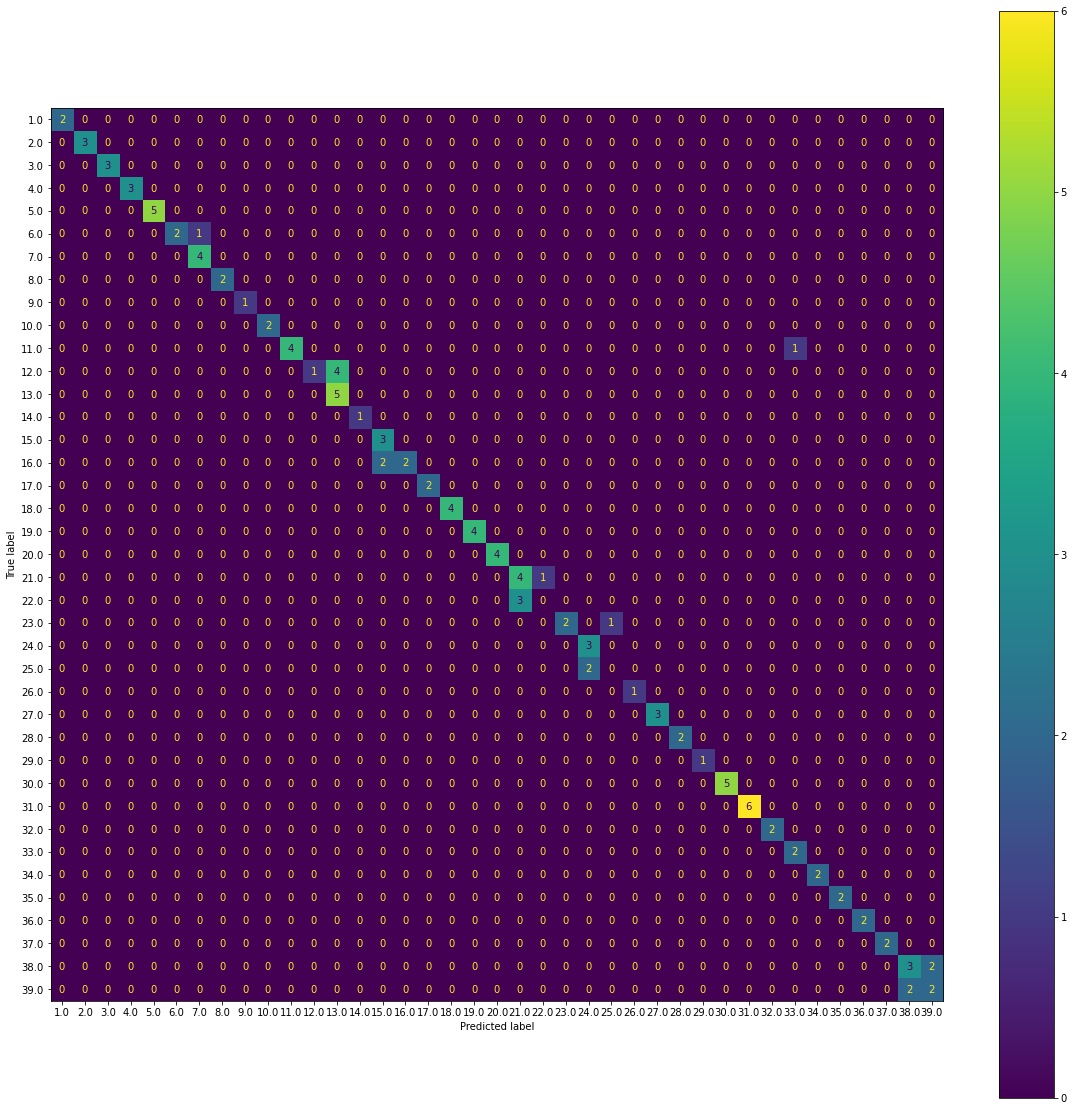

In [34]:
fig, ax = plt.subplots(figsize=(20, 20))
sklearn.metrics.plot_confusion_matrix(RandomizedSearch.best_estimator_, MFCC_test,y_test, ax=ax)
plt.show()

### In the following cell the KNN is applied for MFCC_Delta Features

In [35]:
np.random.seed(0)  
param_distribution={'n_neighbors':[np.random.randint(1, 30)], 'weights':['uniform', 'distance']} #, 
KNN= sklearn.neighbors.KNeighborsClassifier()
RandomizedSearch= sklearn.model_selection.GridSearchCV(KNN,param_distribution,
                                                       verbose=1, cv=5)
RandomizedSearch.fit(MFCC_Delta_train, y_train); 

KNN_Score= RandomizedSearch.best_score_*100
print("The best score is: %.2f" %KNN_Score)
print("The best patameters is:", RandomizedSearch.best_params_)

# Training and testing Scores
GStrain=RandomizedSearch.best_estimator_.score(MFCC_Delta_train,y_train)*100
GStest= RandomizedSearch.best_estimator_.score(MFCC_Delta_test,y_test)*100
print('Randomized search:')
print('%.1f%% train accuracy' %GStrain)
print('%.1f%% test accuracy' %GStest)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
The best score is: 7.08
The best patameters is: {'n_neighbors': 13, 'weights': 'distance'}
Randomized search:
100.0% train accuracy
2.5% test accuracy


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


## $\color{red}{\text{It is Overfitted, and needs to be solved}}$

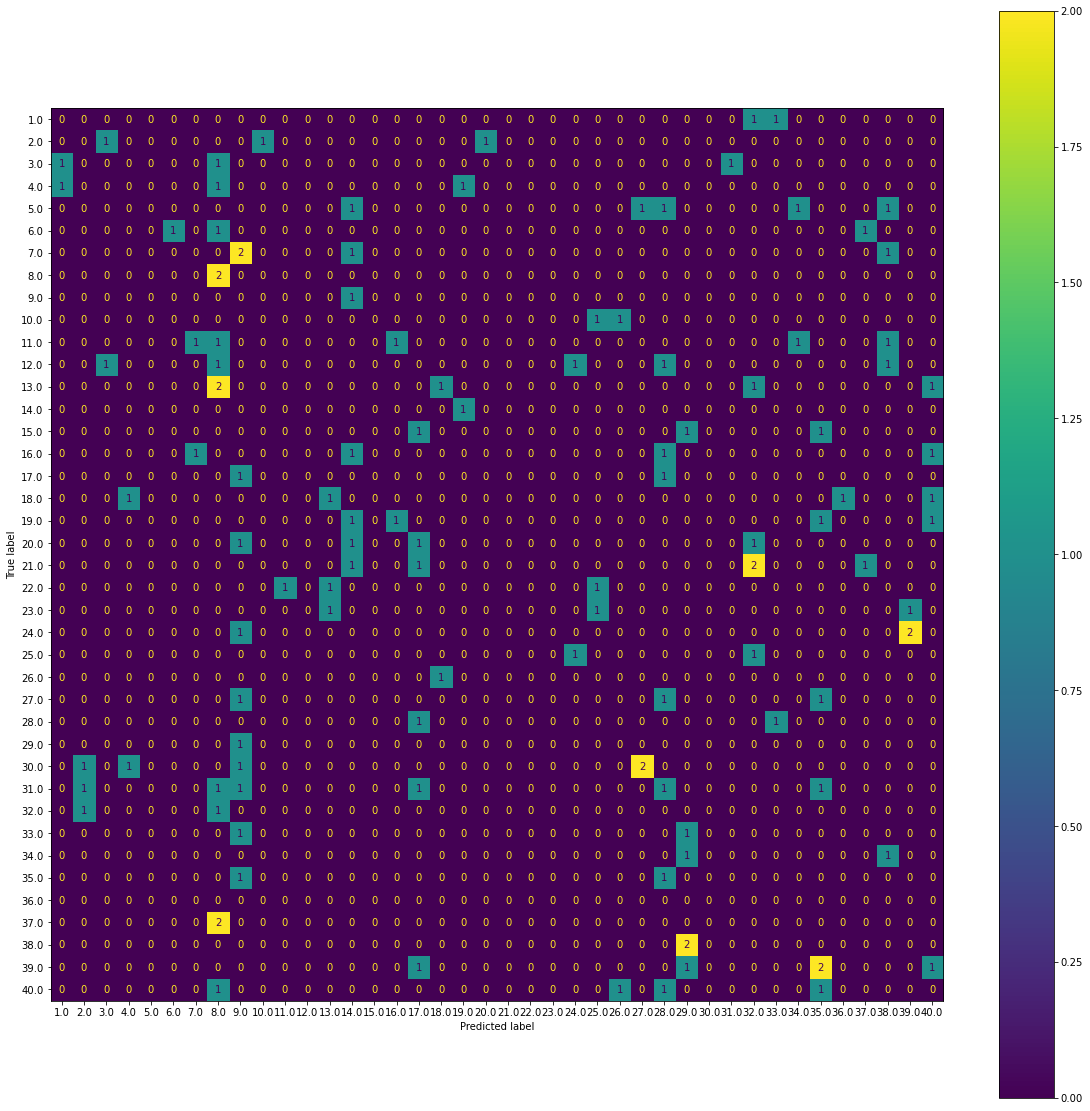

In [37]:
fig, ax = plt.subplots(figsize=(20, 20))
sklearn.metrics.plot_confusion_matrix(RandomizedSearch.best_estimator_, MFCC_Delta_test,y_test, ax=ax)
plt.show()

Now we are going to apply the SVM:

In [52]:
SVC= sklearn.svm.LinearSVC(multi_class='crammer_singer')
param_distribution= {'C':scipy.stats.reciprocal(1, 100)}
RandomizedSearchCV= sklearn.model_selection.RandomizedSearchCV(SVC, param_distribution,
                                                               random_state=0, verbose=1, n_iter=20, cv=5)
RandomizedSearchCV.fit(MFCC_train, y_train);

SVC_Score= RandomizedSearchCV.best_score_*100
print("The best score is: %.2f" %SVC_Score)
print("The best patameters is:", RandomizedSearchCV.best_params_)

# Training and testing Scores
SVCtrain=RandomizedSearchCV.best_estimator_.score(MFCC_train,y_train)*100
SVCtest= RandomizedSearchCV.best_estimator_.score(MFCC_test,y_test)*100
print('Randomized search:')
print('%.1f%% train accuracy' %SVCtrain)
print('%.1f%% test accuracy' %SVCtest)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


The best score is: 89.58
The best patameters is: {'C': 5.846326121643412}
Randomized search:
99.4% train accuracy
86.7% test accuracy


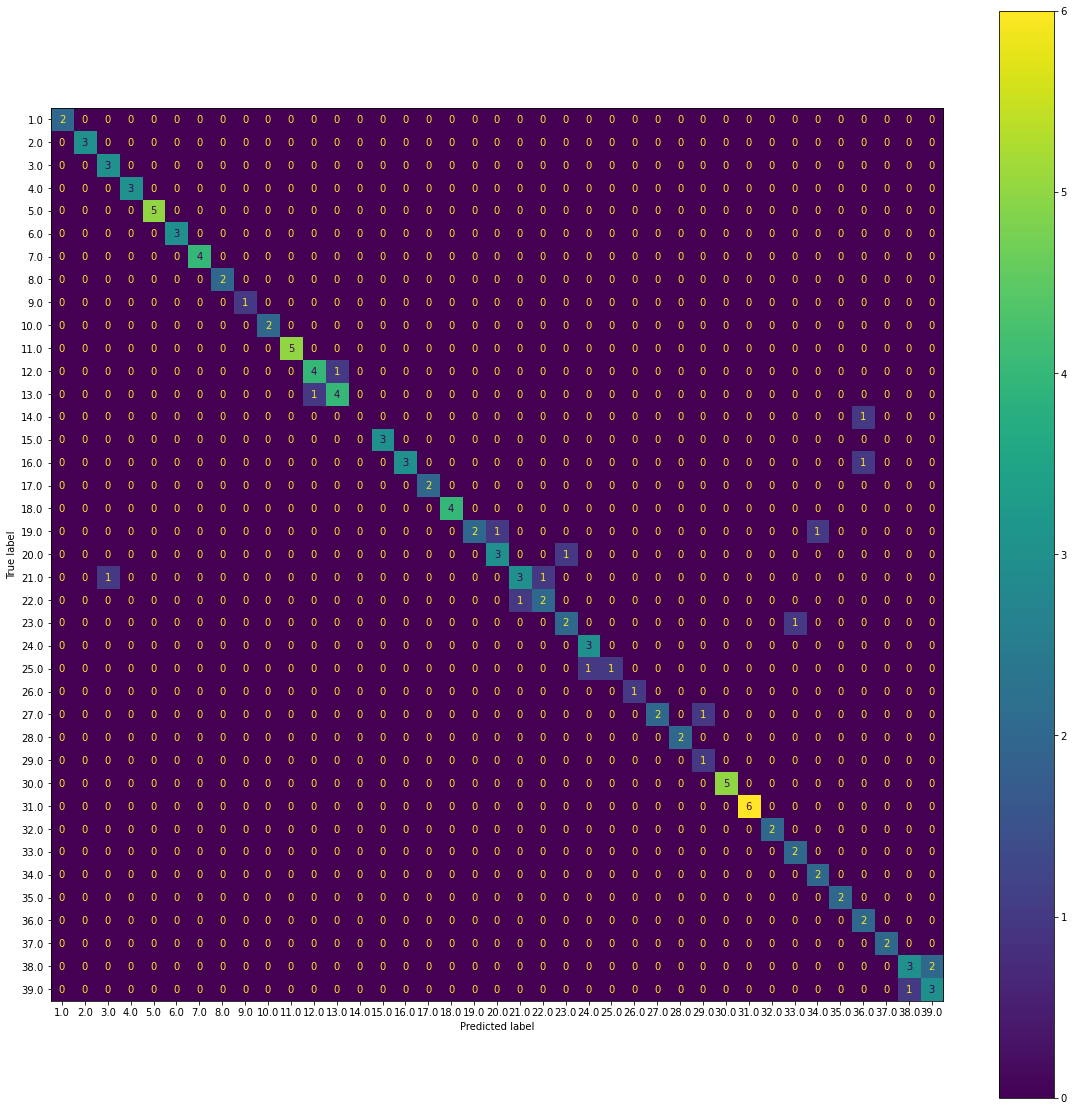

In [40]:
fig, ax = plt.subplots(figsize=(20, 20))
sklearn.metrics.plot_confusion_matrix(RandomizedSearchCV.best_estimator_, MFCC_test,y_test, ax=ax)
plt.show()

In [ ]:
SVC= sklearn.svm.LinearSVC(multi_class='crammer_singer')
param_distribution= {'C':scipy.stats.reciprocal(1, 100)}
RandomizedSearchCV= sklearn.model_selection.RandomizedSearchCV(SVC, param_distribution,
                                                               random_state=0, verbose=1, n_iter=20, cv=5)
RandomizedSearchCV.fit(MFCC_Delta_train, y_train); 

SVC_Score= RandomizedSearchCV.best_score_*100
print("The best score is: %.2f" %SVC_Score)
print("The best patameters is:", RandomizedSearchCV.best_params_)

# Training and testing Scores
SVCtrain=RandomizedSearchCV.best_estimator_.score(MFCC_Delta_train,y_train)*100
SVCtest= RandomizedSearchCV.best_estimator_.score(MFCC_Delta_test,y_test)*100
print('Randomized search:')
print('%.1f%% train accuracy' %SVCtrain)
print('%.1f%% test accuracy' %SVCtest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\babah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\babah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\babah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\babah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\babah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\Users\babah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\babah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\babah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\babah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\babah\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

In [53]:
from sklearn.multiclass import OneVsRestClassifier
model= OneVsRestClassifier(sklearn.svm.LinearSVC(random_state=0)).fit(MFCC_Delta_train, y_train)
print(model.score(MFCC_Delta_train,y_train)*100)
print(model.score(MFCC_Delta_test,y_test)*100)

17.708333333333336
5.0


# Plotting the Confusion Matrix

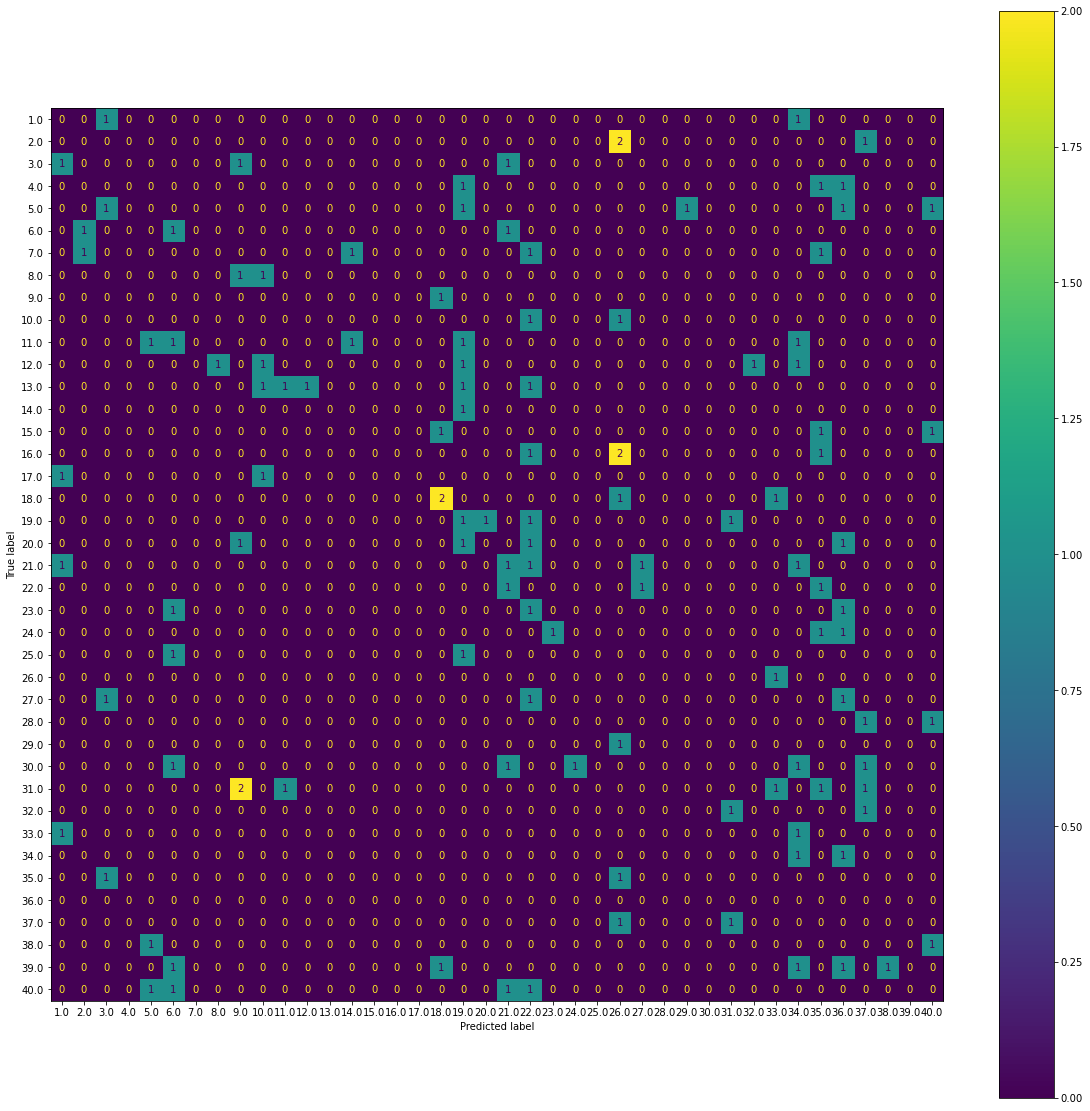

In [54]:
fig, ax = plt.subplots(figsize=(20, 20))
sklearn.metrics.plot_confusion_matrix(model, MFCC_Delta_test,y_test, ax=ax)
plt.show()